# Time Series Forecasting with ARIMA
Weina Ma - January 29, 2018

* 搭建ARIMA模型对时间序列进行预测
* 从历史的数据中学习随时间变化的模式，然后用这个规律去预测未来
* 实际值和预测值的差可作为系统异常的重要指标

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import missingno as msno
from datetime import datetime
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.0f}'.format

In [161]:
def parser(x):
    x=str(x)
    year = '20' + x[4:6]
    month = x[0:2]
    day = x[2:4]
    hour = x[6:8]
    minute = x[8:]
    return year + "-" + month + "-" + day + " " + hour + ":" + minute

for i in xrange(5, 18):
    if i < 10:
        mark = "0"
    else:
        mark = ""
    df = pd.read_csv('../../201801/201801' + mark + str(i) + '.csv', encoding='gbk', dtype={'CALLING_DATE': object, 'CALLING_TIME': object})

    # filter dailed out & 95588 & area_code + 95588
    df = df[(df['CALL_TYPE'] == 1) & \
            (df['CALLING_NUM']/1000000 >= 1) & ((df['CALLING_NUM']%100000 != 95588) | (df['CALLING_NUM']/100000000 >= 1))]
    
    # filter test numbers
    df = df[df['CALLING_NUM'].isin([18210261957, 18210261795, 17343195721, \
                                   17718332497, 13263105230, 13263103918]) == False]
    
    # filter IN_TRK_CODE
    df = df[df['IN_TRK_CODE'].isin([4860,4881,4815,4816,4834,4873,4878,4899,4820,4862,\
                                4849,4850,4828,4827,4858,4859,4840,4829,4848,4830,\
                                4831,4832,4833,4847,4854,4705,4706,4707,4708,4709,\
                                4710,4711,4712,4713,4714,4855,4715,4716,4717,4718,\
                                4719,4720,4721,4722,4723,4724,4856,4725,4726,4727,\
                                4728,4729,4730,4731,4732,4733,4857,4700,4701,4702,\
                                4703,4704,4872,4804,4894,4801,4898,4821,4805,4897,\
                                4806,4802,4892,4893,4890,4861,4870,4826,4885,4886,\
                                4810,4811,4852,4853,4880,4879,4807,4823,4876,4877,\
                                4808,4803,4812])]

    df['CALLING_DATE'] = df['CALLING_DATE'].astype(str) 
    df['CALLING_TIME'] = df['CALLING_TIME'].astype(str)
    df['time'] = df.apply (lambda row: row.CALLING_DATE + row.CALLING_TIME[0:3] + '0',axis=1)
    df=df.sort_values(['time'])
    
    time_list = df['time'].unique()
    count_list = df.groupby(['time']).size()
    df_1 = pd.DataFrame()
    se = pd.Series(count_list)
    df_1['time'] = time_list
    df_1['count'] = se.values
    
    df_1['time'] = df_1['time'].apply(parser)
    df_1['count'] = df_1['count'].astype(float)
    df_1.to_csv("../arima/201801.csv", encoding='utf-8', index=False, mode='a', header=False)

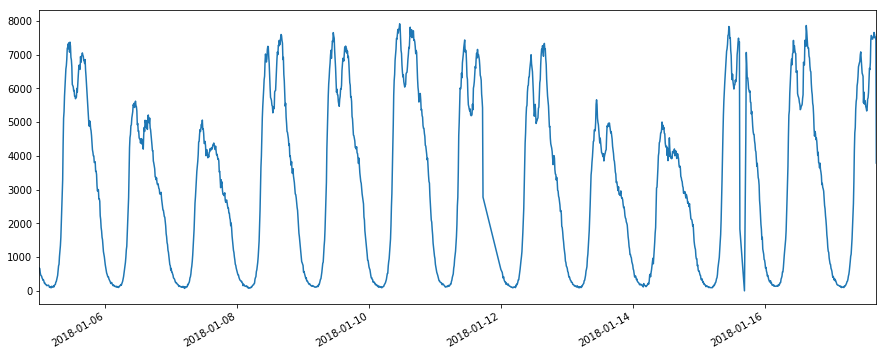

In [162]:
series = pd.Series.from_csv('../arima/201801.csv', header=None)
series.columns = ['date', 'count']
series.plot(figsize=(15, 6))
plt.pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1779
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12425.733
Method:                       css-mle   S.D. of innovations            261.281
Date:                Mon, 29 Jan 2018   AIC                          24865.467
Time:                        22:33:00   BIC                          24903.853
Sample:                    01-05-2018   HQIC                         24879.645
                         - 01-17-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4751     15.310     -0.096      0.923     -31.481      28.531
ar.L1.D.y      0.4301      0.025     17.188      0.000       0.381       0.479
ar.L2.D.y     -0.2227      0.027     -8.175      0.0

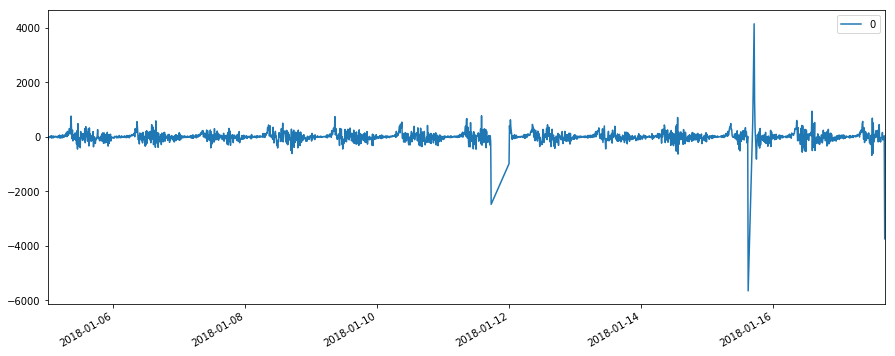

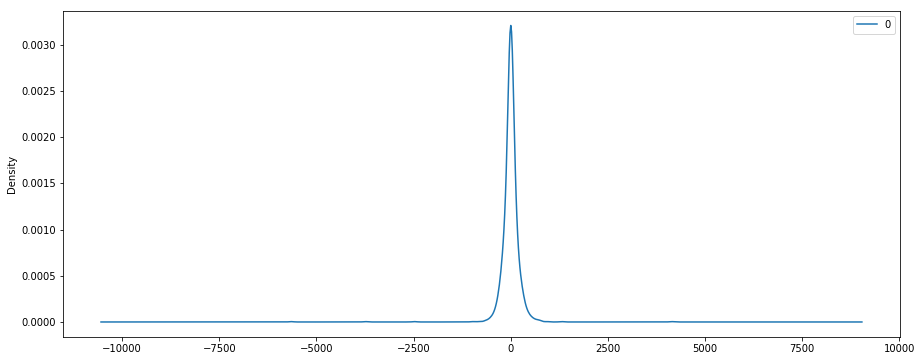

          0
count  1779
mean      0
std     261
min   -5650
25%     -69
50%       2
75%      74
max    4144


In [170]:
X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(15, 6))
plt.pyplot.show()
residuals.plot(kind='kde', figsize=(15, 6))
plt.pyplot.show()
print(residuals.describe())

predicted=109.956572, expected=98.000000
predicted=86.925694, expected=115.000000
predicted=115.508200, expected=105.000000
predicted=100.382876, expected=96.000000
predicted=93.030674, expected=98.000000
predicted=96.491088, expected=98.000000
predicted=95.726261, expected=95.000000
predicted=93.438345, expected=93.000000
predicted=91.827973, expected=96.000000
predicted=95.986812, expected=135.000000
predicted=147.785534, expected=129.000000
predicted=133.341087, expected=144.000000
predicted=155.610104, expected=185.000000
predicted=202.997327, expected=180.000000
predicted=187.179081, expected=235.000000
predicted=261.531055, expected=241.000000
predicted=253.950331, expected=292.000000
predicted=320.206233, expected=362.000000
predicted=398.936945, expected=389.000000
predicted=419.415428, expected=486.000000
predicted=540.162728, expected=668.000000
predicted=755.298780, expected=778.000000
predicted=864.438911, expected=897.000000
predicted=996.853205, expected=989.000000
predic

predicted=5281.541821, expected=5396.000000
predicted=5425.069899, expected=5467.000000
predicted=5443.689840, expected=5488.000000
predicted=5473.139032, expected=5526.000000
predicted=5538.359697, expected=5699.000000
predicted=5780.070169, expected=5809.000000
predicted=5834.286093, expected=6772.000000
predicted=7222.756360, expected=6698.000000
predicted=6467.436956, expected=6692.000000
predicted=6940.959096, expected=7423.000000
predicted=7795.804738, expected=7396.000000
predicted=7313.619978, expected=7243.000000
predicted=7336.997966, expected=7861.000000
predicted=8200.400658, expected=7692.000000
predicted=7516.986148, expected=7443.000000
predicted=7507.995093, expected=7250.000000
predicted=7196.953423, expected=7188.000000
predicted=7218.832507, expected=7195.000000
predicted=7141.336675, expected=6953.000000
predicted=6794.617379, expected=6902.000000
predicted=6916.934470, expected=6657.000000
predicted=6501.135126, expected=6519.000000
predicted=6498.771019, expected=

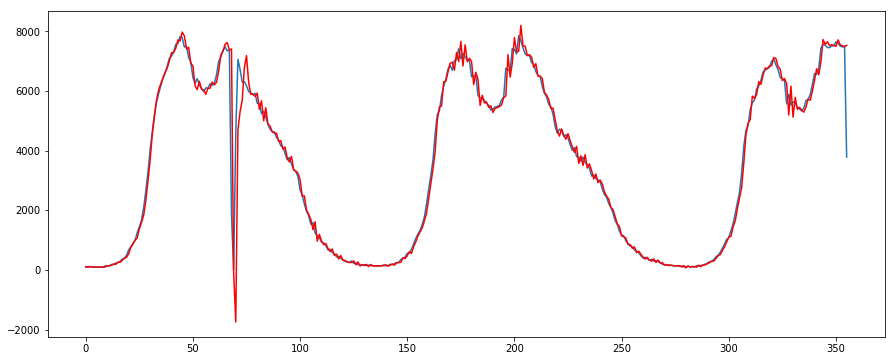

In [171]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.pyplot.figure(figsize=(15,6))
plt.pyplot.plot(test)
plt.pyplot.plot(predictions, color='red')
plt.pyplot.show()